## Machine Learning Process Tutorial
Extensive tutorial illustrating the machine learning process using the cruise ship dataset

Author: Benjamin O. Tayo
Date: 5/23/2020

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('lr', LinearRegression())])
pipe_knr = Pipeline([('scl', StandardScaler()),('knr', KNeighborsRegressor(n_neighbors = 3))])
pipe_svr = Pipeline([('scl', StandardScaler()),('svr', SVR(kernel='linear',C=1.0))])

# 2. Read dataset and select predictor and target variables

In [2]:
df=pd.read_csv("cruise_ship_info.csv")
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
sc_y = StandardScaler()
train_score_lr = []
train_score_knr =  []
train_score_svr =  []

# 3. Model Building and Evaluation

In [3]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr, np.mean(cross_val_score(pipe_lr, X_train, y_train_std, scoring ='r2' , cv = 10)))
    train_score_knr = np.append(train_score_knr, np.mean(cross_val_score(pipe_knr, X_train, y_train_std, scoring ='r2' , cv = 10)))
    train_score_svr = np.append(train_score_svr, np.mean(cross_val_score(pipe_svr, X_train, y_train_std, scoring ='r2' , cv = 10)))

In [4]:
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knr = np.mean(train_score_knr)
train_std_knr = np.std(train_score_knr)
train_mean_svr = np.mean(train_score_svr)
train_std_svr = np.std(train_score_svr)

In [5]:
print('R2 train for lr: %.3f +/- %.3f' % (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' % (train_mean_knr,train_std_knr))
print('R2 train for svm_lr: %.3f +/- %.3f' % (train_mean_svr,train_std_svr))

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.866 +/- 0.027
R2 train for svm_lr: 0.913 +/- 0.015


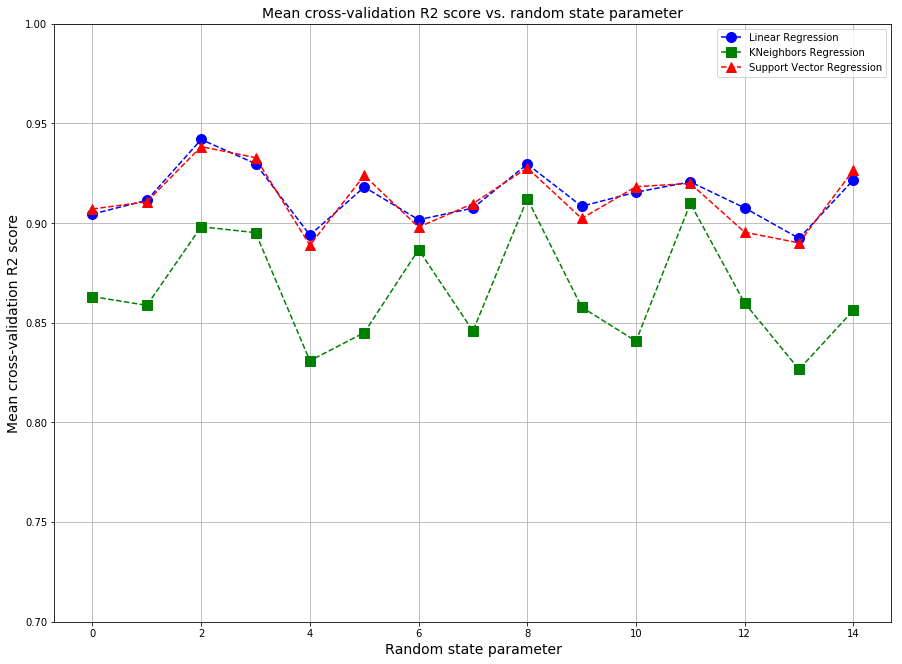

In [6]:
plt.figure(figsize=(15,11))

plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, label= 'Linear Regression')


plt.plot(range(n),train_score_knr,color='green', linestyle='dashed', 
         marker='s',markerfacecolor='green', markersize=10, label = 'KNeighbors Regression')


plt.plot(range(n),train_score_svr,color='red', linestyle='dashed', 
         marker='^',markerfacecolor='red', markersize=10, label = 'Support Vector Regression')


plt.grid()
plt.ylim(0.7,1)
plt.title ('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()

## 4. Model's Performance on Test Set

In [7]:
pipe_lr.fit(X_train, y_train_std)
pipe_knr.fit(X_train, y_train_std)
pipe_svr.fit(X_train, y_train_std)
r2_score_lr = r2_score(y_test, sc_y.inverse_transform(pipe_lr.predict(X_test)))
r2_score_knr = r2_score(y_test, sc_y.inverse_transform(pipe_knr.predict(X_test)))
r2_score_svr = r2_score(y_test, sc_y.inverse_transform(pipe_svr.predict(X_test)))

In [8]:
print('R2 test for lr:  %.3f ' % r2_score_lr)
print('R2 test for knr: %.3f ' % r2_score_knr)
print('R2 test for svr: %.3f ' % r2_score_svr)

R2 test for lr:  0.938 
R2 test for knr: 0.888 
R2 test for svr: 0.948 
